<a href="https://colab.research.google.com/github/spisupat/RL_tutorials/blob/main/Associative_learning_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rescorla-Wagner learning
The Rescorla-Wagner learning rule is a simple error-correcting model of Pavlovian conditioning. The gist of the rule is that learning does not simply depend on the co-occurence of a CS-US pair, but on *surprising* co-occurences. 

This surprise or **prediction error** is computed as the difference between the actual outcome **R**(i.e. the experienced US) and a predicted outcome based on the experienced CSs in the form of **associative strengths V** summed across CSs. Learning proceeds by **updating** the associative strength of each CS on each trial in proportion to the prediction error and a learning rate $\eta$.

In other words:\
$$\Delta V = \eta [R_{US} -\Sigma_{j \, \epsilon \, trial}{V(CS_j)}]\\
V(CS_i)_{T+1} \leftarrow V(CS_i)_T + \Delta V
$$

\\
Let us try to simulate this learning rule and observe its predictions for different kinds of conditioning. Let us start with a *single* CS and US - here we need to learn a single associative strength V, whose update equation is given by:\
$$\Delta V = \eta [R_{US} -V]\\
V_{T+1} \leftarrow V_T + \Delta V
$$ The following code sets up the stimuli experienced on each trial during the task 

(Scroll down for solutions!). 


In [16]:
# Importing some basic libraries we will use
import numpy as np # Mathematical library with support for matrix manipulation akin to MATLAB
import matplotlib.pyplot as plt #Plotting library similar to MATLAB's "plot"

# Stimulus for basic conditioning - single CS, always rewarded with US
nTrials = 40                   # Total number of trials
S = np.ones([1,nTrials])       # CS
R = np.ones([1,nTrials])       # US

# Associative learning variables
nStim = np.size(S,0)           # Total number of CSs
V = np.zeros([nStim, nTrials]) # Vector of associative strengths of each CS on each trial
V[0,0] = 0                     # Initialize all associative strengths to zero on 1st trial (starts at index 0)
eta = 0.5                      # Learning rate

## Question 1
Write code to update the value of the associative strength **V** on each trial after observing the US

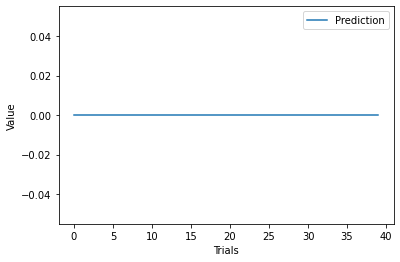

In [ ]:
for t in np.arange(nTrials-1):
  s = S[:,t] # CS on current trial
  v = V[:,t] # Predicted US on current trial
  r = R[:,t] # US on current trial

  #*** Insert learning rule to update V here ***
  

# Plot US predictions as a function of learning
plt.plot(np.sum(V,0),label = 'Prediction')
plt.xlabel('Trials')
plt.ylabel('Value')
plt.legend()
plt.show()

### Question 1: Solution

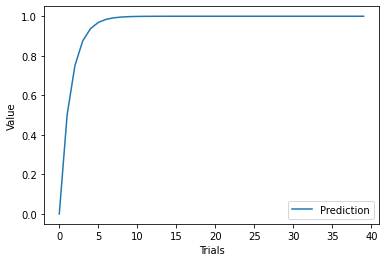

In [ ]:
for t in np.arange(nTrials-1):
  s = S[:,t] # CS on current trial
  v = V[:,t] # Predicted US on current trial
  r = R[:,t] # US on current trial

  # Calculate prediction error between US and predictions (associative strengths summed across all CSs present in current trial)
  delta = eta * (r - np.sum(v[s==1]))
  # Update these associative strengths with this prediction error
  V[s==1,t+1] = V[s==1,t] + delta
  V[s==0,t+1] = V[s==0,t]


# Plot US predictions as a function of learning
plt.plot(np.sum(V,0),label = 'Prediction')
plt.xlabel('Trials')
plt.ylabel('Value')
plt.legend()
plt.show()

## Question 2
What happens to the learning curve & asymptotic predictions when you change the learning rate $\eta$? 

### Question 2: Solution

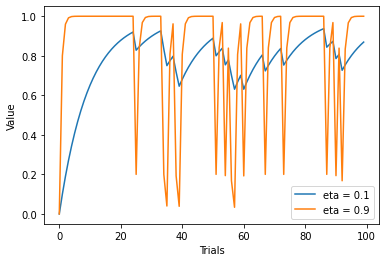

In [ ]:
# Slow learning rate
nTrials = 100
S = np.ones([1,nTrials])       # CS
R = np.ones([1,nTrials])       # US

eta = 0.1
V = np.zeros([nStim, nTrials]) 
for t in np.arange(nTrials-1):
  s = S[:,t] 
  v = V[:,t] 
  r = np.random.rand()<0.8 
  R[:,t] = r

  delta = eta * (r - np.sum(v[s==1]))
  V[s==1,t+1] = V[s==1,t] + delta
  V[s==0,t+1] = V[s==0,t]

VSlow = V

# Fast learning rate
eta = 0.8
V = np.zeros([nStim, nTrials]) 
for t in np.arange(nTrials-1):
  s = S[:,t]
  v = V[:,t] 
  r = R[:,t]

  delta = eta * (r - np.sum(v[s==1]))
  V[s==1,t+1] = V[s==1,t] + delta
  V[s==0,t+1] = V[s==0,t]

VFast = V

# Plot US predictions as a function of learning
plt.plot(np.sum(VSlow,0),label = 'eta = 0.1')
plt.plot(np.sum(VFast,0),label = 'eta = 0.9')
plt.xlabel('Trials')
plt.ylabel('Value')
plt.legend()
plt.show()

**The learning rate controls the speed of learning - the higher the learning rate, the faster the learning and higher the slope of the learning curve - but doesn't change the asymptotic prediction**


## Question 3
Now, use the same learning rule to simulate Kamin Blocking (1968) - where the prior learning of an association with a light ($CS_1$) prevents conditioning with a compound of a light and tone ($CS_2$) in the future. What behavior does Rescorla-Wagner learning produce & why? 

In [ ]:
# Stimulus for Kamin blocking - light only followed by light+tone, always rewarded with US
nTrials = 80                   # Total number of trials
S = np.zeros([2,nTrials])      # CS
S[0,0:80] = 1                  # CS1 is on in every trial 
S[1,40:80] = 1                 # CS2 is on only in second phase of training (trial 40 onwards)
R = np.ones([1,nTrials])       # US

# Associative learning variables
nStim = np.size(S,0)           # Total number of CSs
V = np.zeros([nStim, nTrials]) # Vector of associative strengths of each CS on each trial
V[0,0] = 0                     # Initialize all associative strengths to zero on 1st trial (starts at index 0)
eta = 0.1                      # Learning rate


### Question 3: Solution

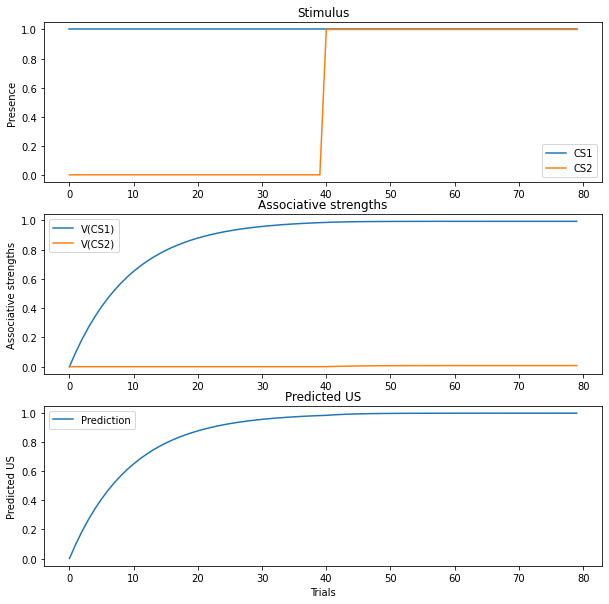

In [ ]:
for t in np.arange(nTrials-1):
  s = S[:,t] # CS on current trial
  v = V[:,t] # Predicted US on current trial
  r = R[:,t] # US on current trial

  # Calculate prediction error between US and predictions (associative strengths summed across all CSs present in current trial)
  delta = eta * (r - np.sum(v[s==1]))
  # Update these associative strengths with this prediction error
  V[s==1,t+1] = V[s==1,t] + delta
  V[s==0,t+1] = V[s==0,t]



# Plot active CSs
plt.figure(figsize=(10,10))
plt.subplot(312,title='Associative strengths')
plt.plot(V.T)
plt.ylabel('Associative strengths')
plt.legend(['V(CS1)','V(CS2)','V(CS1+CS2)'])

# Plot Associative strengths
plt.subplot(311,title='Stimulus')
plt.plot(S.T)
plt.ylabel('Presence')
plt.legend(['CS1','CS2','CS1+CS2'])

# Plot US predictions as a function of learning
plt.subplot(313,title='Predicted US')
plt.plot(np.sum(V*S,0),label = 'Prediction')
plt.xlabel('Trials')
plt.ylabel('Predicted US')
plt.legend()
plt.show()

**Rescorla-Wagner learning produces no learning in the second phase, since the CS1 already perfectly predicts the US, producing no prediction error and no further learning for CS2** 

## Bonus question
What happens when Rescorla-Wagner learning is applied to the **XOR problem** and why? In other words:
$$ CS_1 \rightarrow US\\ CS_2 \rightarrow US\\ CS_1 + CS_2 \rightarrow \text{no } US$$

### Bonus question: Solution

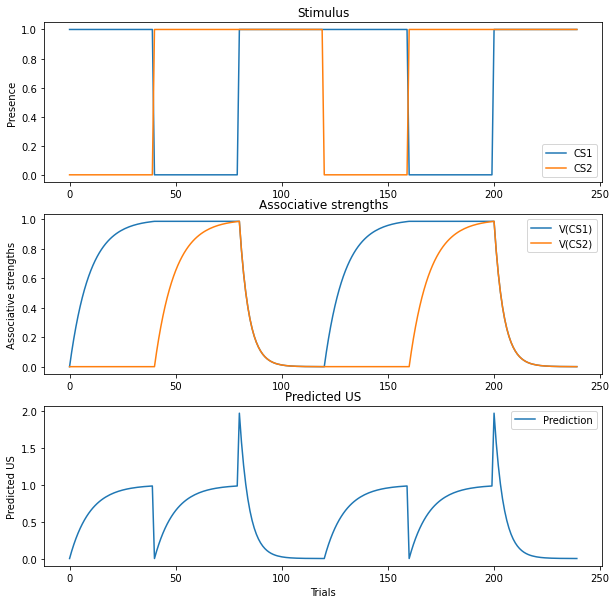

In [ ]:
nTrials = 240                   # Total number of trials
S = np.zeros([2,nTrials])       # CS
R = np.zeros([1,nTrials])       # CS
trialsCS1 = [np.arange(0,40),np.arange(120,160)]
S[0,trialsCS1] = 1                   # CS1 only
R[0,trialsCS1] = 1                   # CS1 -> US

trialsCS2 = [np.arange(40,80),np.arange(160,200)]
S[1,trialsCS2] = 1                  # CS2 only
R[0,trialsCS2] = 1                  # CS2 -> US

trialsCompound = [np.arange(80,120),np.arange(200,240)]
S[:,trialsCompound] = 1                 # CS1 + CS2
R[0,trialsCompound] = 0                 # CS1 + CS2 -> no US


# Associative learning variables
nStim = np.size(S,0)           # Total number of CSs
V = np.zeros([nStim, nTrials]) # Vector of associative strengths of each CS on each trial
V[:,0] = 0                     # Initialize all associative strengths to zero on 1st trial (starts at index 0)
eta = 0.1                      # Learning rate

for t in np.arange(nTrials-1):
  s = S[:,t] # CS on current trial
  v = V[:,t] # Predicted US on current trial
  r = R[:,t] # US on current trial

  # Calculate prediction error between US and predictions (associative strengths summed across all CSs present in current trial)
  delta = eta * (r - np.sum(v[s==1]))
  # Update these associative strengths with this prediction error
  V[s==1,t+1] = V[s==1,t] + delta
  V[s==0,t+1] = V[s==0,t]


# Plot active CSs
plt.figure(figsize=(10,10))
plt.subplot(312,title='Associative strengths')
plt.plot(V.T)
plt.ylabel('Associative strengths')
plt.legend(['V(CS1)','V(CS2)','V(CS1+CS2)'])

# Plot Associative strengths
plt.subplot(311,title='Stimulus')
plt.plot(S.T)
plt.ylabel('Presence')
plt.legend(['CS1','CS2','CS1+CS2'])

# Plot US predictions as a function of learning
plt.subplot(313,title='Predicted US')
plt.plot(np.sum(V*S,0),label = 'Prediction')
plt.xlabel('Trials')
plt.ylabel('Predicted US')
plt.legend()
plt.show()

**Rescorla-Wagner learning is incapable of learning this task, since it computes predictions for compound stimuli as the sum of individual predictions - hence it cannot simultaneously maintain positive predictions for the individual elements (CS1,CS2) while making zero predictions for the compound (CS1+CS2). Instead, it pushes the associative strengths towards 0 during compound presentation, and towards 1 during individual element presentation, never converging in this task**

One way to remedy this is to have a heirarchical representation, where the compound stimulus CS1+CS2 is represented as a separate entity and receives its own assocation strength, rather than as a sum of its elements. This is sometimes referred to as a "configural" model, since the entire configuration CS1+CS2 is represented, rather than an "elemental" model where it is broken down into its elements CS1 and CS2. The simulation below demonstrates how this solves the task

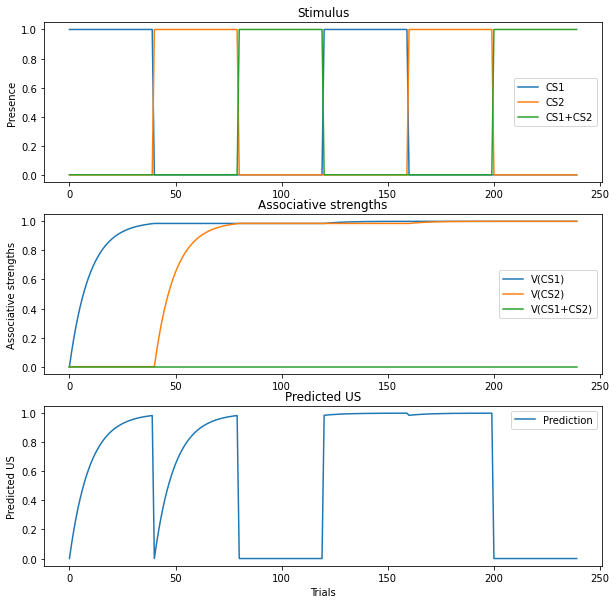

In [ ]:
nTrials = 240                   # Total number of trials
S = np.zeros([3,nTrials])       # CS - notice how this now consists of 3 representations: CS1, CS2 and CS1+CS2
R = np.zeros([1,nTrials])       # CS
trialsCS1 = [np.arange(0,40),np.arange(120,160)]
S[0,trialsCS1] = 1                   # CS1 only
R[0,trialsCS1] = 1                   # CS1 -> US

trialsCS2 = [np.arange(40,80),np.arange(160,200)]
S[1,trialsCS2] = 1                  # CS2 only
R[0,trialsCS2] = 1                  # CS2 -> US

trialsCompound = [np.arange(80,120),np.arange(200,240)]
S[2,trialsCompound] = 1              # CS1 + CS2
R[0,trialsCompound] = 0              # CS1 + CS2 -> no US


# Associative learning variables
nStim = np.size(S,0)           # Total number of CSs
V = np.zeros([nStim, nTrials]) # Vector of associative strengths of each CS on each trial
V[:,0] = 0                     # Initialize all associative strengths to zero on 1st trial (starts at index 0)
eta = 0.1                      # Learning rate

for t in np.arange(nTrials-1):
  s = S[:,t] # CS on current trial
  v = V[:,t] # Predicted US on current trial
  r = R[:,t] # US on current trial

  # Calculate prediction error between US and predictions (associative strengths summed across all CSs present in current trial)
  delta = eta * (r - np.sum(v[s==1]))
  # Update these associative strengths with this prediction error
  V[s==1,t+1] = V[s==1,t] + delta
  V[s==0,t+1] = V[s==0,t]

# Plot active CSs
plt.figure(figsize=(10,10))
plt.subplot(312,title='Associative strengths')
plt.plot(V.T)
plt.ylabel('Associative strengths')
plt.legend(['V(CS1)','V(CS2)','V(CS1+CS2)'])

# Plot Associative strengths
plt.subplot(311,title='Stimulus')
plt.plot(S.T)
plt.ylabel('Presence')
plt.legend(['CS1','CS2','CS1+CS2'])

# Plot US predictions as a function of learning
plt.subplot(313,title='Predicted US')
plt.plot(np.sum(V*S,0),label = 'Prediction')
plt.xlabel('Trials')
plt.ylabel('Predicted US')
plt.legend()
plt.show()

Note that if the individual representations were *also* active during compound presentation, then the compound would have to accrue *negative* associative strength, becoming a conditioned inhibitor, rather than simply retaining a zero association. The simulation below demonstrates this

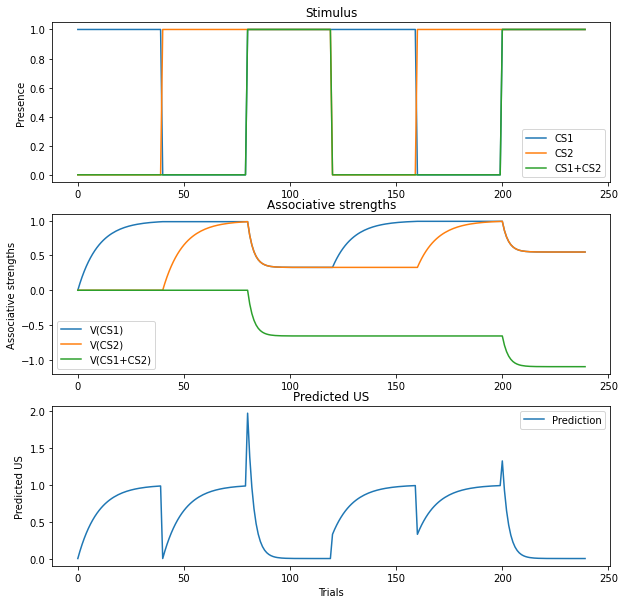

In [ ]:
nTrials = 240                   # Total number of trials
S = np.zeros([3,nTrials])       # CS - notice how this now consists of 3 representations: CS1, CS2 and CS1+CS2
R = np.zeros([1,nTrials])       # CS
trialsCS1 = [np.arange(0,40),np.arange(120,160)]
S[0,trialsCS1] = 1                   # CS1 only
R[0,trialsCS1] = 1                   # CS1 -> US

trialsCS2 = [np.arange(40,80),np.arange(160,200)]
S[1,trialsCS2] = 1                  # CS2 only
R[0,trialsCS2] = 1                  # CS2 -> US

trialsCompound = [np.arange(80,120),np.arange(200,240)]
S[:,trialsCompound] = 1              # CS1, CS2 and CS1 + CS2 representations active
R[0,trialsCompound] = 0              # CS1 + CS2 -> no US


# Associative learning variables
nStim = np.size(S,0)           # Total number of CSs
V = np.zeros([nStim, nTrials]) # Vector of associative strengths of each CS on each trial
V[:,0] = 0                     # Initialize all associative strengths to zero on 1st trial (starts at index 0)
eta = 0.1                      # Learning rate

for t in np.arange(nTrials-1):
  s = S[:,t] # CS on current trial
  v = V[:,t] # Predicted US on current trial
  r = R[:,t] # US on current trial

  # Calculate prediction error between US and predictions (associative strengths summed across all CSs present in current trial)
  delta = eta * (r - np.sum(v[s==1]))
  # Update these associative strengths with this prediction error
  V[s==1,t+1] = V[s==1,t] + delta
  V[s==0,t+1] = V[s==0,t]

# Plot active CSs
plt.figure(figsize=(10,10))
plt.subplot(312,title='Associative strengths')
plt.plot(V.T)
plt.ylabel('Associative strengths')
plt.legend(['V(CS1)','V(CS2)','V(CS1+CS2)'])

# Plot Associative strengths
plt.subplot(311,title='Stimulus')
plt.plot(S.T)
plt.ylabel('Presence')
plt.legend(['CS1','CS2','CS1+CS2'])

# Plot US predictions as a function of learning
plt.subplot(313,title='Predicted US')
plt.plot(np.sum(V*S,0),label = 'Prediction')
plt.xlabel('Trials')
plt.ylabel('Predicted US')
plt.legend()
plt.show()